# 假设验证：检验心理学现象

## 背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

## (1) 自变量是什么？因变量是什么？
自变量是一致文字条件，因变量是不一致文字条件

## (2) 此任务的适当假设集是什么？你想执行什么类型的统计检验？

假设集是对在该网站上所有参与斯特鲁普测试并提交测试结果的人，进行随机抽样而得到的一个随机样本
$$
H_0(原假设): \mu_{con} -\mu_{incon} \geq 0 \\
H_1(备择假设): \mu_{con} -\mu_{incon} < 0
$$
- $\mu_{con}:一致文字条件样本的平均时间$
- $\mu_{incon}$:不一致文字条件样本的平均时间

采用T检验来进行统计检验，选择的理由：数据集中采样数据量为24 < 30,得到的数据分布为非正态分布，而是t分布，可以采用t检验

[此链接](https://faculty.washington.edu/chudler/java/ready.html)其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

## (3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [2]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [3]:
df_stroop = pd.read_csv("stroopdata.csv")
#获取数据的基本信息
df_stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


数据集包含Congruent和Incongruent各24条非零float的数据

In [4]:
# 一致文字条件下的均值和方差
mean_con = df_stroop.Congruent.mean()
std_con = df_stroop.Congruent.std()
print("一致文字条件, 均值：", mean_con, "标准差：", std_con)

一致文字条件, 均值： 14.051125000000004 标准差： 3.559357957645195


In [5]:
# 不一致文字条件下的均值和方差
mean_incon = df_stroop.Incongruent.mean()
std_incon = df_stroop.Incongruent.std()
print("不一致文字条件, 均值：", mean_incon, "标准差：", std_incon)

不一致文字条件, 均值： 22.01591666666667 标准差： 4.797057122469138


In [6]:
# 样本均值
sample_mean= (mean_con + mean_incon) / 2
print(sample_mean)

18.033520833333338


## (4) 用可视化进行结果观察结果呈现

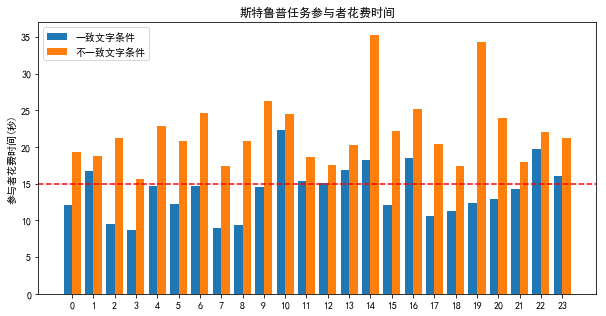

In [47]:
plt.figure(figsize=(10, 5))
width = 0.4
x= np.arange(df_stroop.shape[0])

plt.bar(x - width/2, df_stroop.Congruent, \
        width = width, label = "一致文字条件")
plt.bar(x + width/2, df_stroop.Incongruent, \
        width = width, label = "不一致文字条件")

# 添加两条辅助线
plt.axhline(15, color = "red", linestyle = "--")

plt.ylabel("参与者花费时间(秒)")
plt.title("斯特鲁普任务参与者花费时间")
plt.xticks(range(df_stroop.shape[0]))
plt.legend()
plt.show();

从上述柱状图可以看出：
- 任意一组参与者在不一致文字条件下花费的时间均多于一致文字条件下的。
- 不一致文字条件下参与者花费的时间多数在15秒以上，在一致文字条件下多数少于15秒。

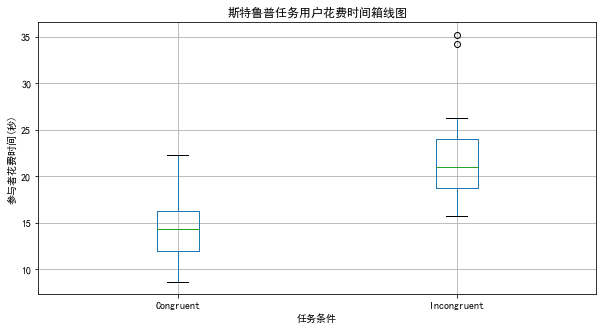

In [40]:
plt.figure(figsize=(10, 5))
df_stroop.boxplot()
plt.xlabel("任务条件")
plt.ylabel("参与者花费时间(秒)")
plt.title("斯特鲁普任务用户花费时间箱线图");

由箱线图可以看到：
- 一致文字条件下下限、Q1、中位数、Q3、上限都分别比不一致文字条件下的小。
- 不一致文字条件存在两个异常值
- 不一致文字条件反应时间相对来说更长一些
- 一致文字条件和不一致文字条件的上限时间相差不大(异常值除外)。

## (5) 执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

### T检验

置信水平为95%，$\alpha$阈值为0.05

In [8]:
stats.stats.ttest_ind(df_stroop.Congruent, df_stroop.Incongruent, equal_var=False)


Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.510167390442638e-08)

p远小于0.05，拒绝原假设。

### 自助法

In [9]:
con_mean, incon_mean = [], []
for _ in range(10000):
    # 执行重采样
    samples = df_stroop.sample(df_stroop.shape[0], replace=True)
    con_mean.append(samples.Congruent.mean())
    incon_mean.append(samples.Incongruent.mean())
mean_diff = pd.Series(con_mean) - pd.Series(incon_mean)

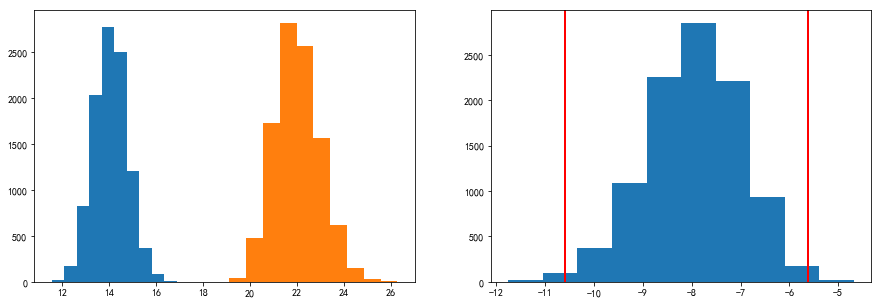

In [10]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(con_mean)
plt.hist(incon_mean)

plt.subplot(122)
low, high = np.percentile(mean_diff,  0.5), np.percentile(mean_diff, 99.5)
plt.hist(mean_diff)
plt.axvline(x = low, color = "red", linewidth = 2)
plt.axvline(x = high, color = "red", linewidth = 2);

### 结论
一致文字条件下，参与者花费的时间小于不一致文字条件的。